## yfinance Library Demo 6/15/2020

### Imports: 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (8, 7)
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

import yfinance as yf

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (roc_auc_score
                             , precision_score
                             , recall_score
                             , roc_curve
                             , confusion_matrix
                             , plot_confusion_matrix
                             , precision_recall_curve
                             , auc
                            )

### Global Variables:

In [2]:
month = '06'

date = '15'

sf_hour = 8 # 6 to 13 military time

# valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
interval = '60m'

perc_inc = 0.008 # 0.8 percent increase from hour to hour or any time period

# start = '2018-07-01'

# end = '2020-' + month + '-' + date

symbol = 'VTI' # VTI or Vanguard Total Stock Market ETF

perc_train = 1 # percent train set

### Yahoo Finance

In [3]:
stock_df = yf.download(tickers = symbol # symbol of stock 
                       
                       , period = '2y' # time span of data e.g. 1y or 10y 
                       
                       , interval = interval # time periods of subinterval e.g. 1m or 1hr
                       
                       # , start = start # start time
                       
                       # , end = end # end time
                       
                       , prepost = True # pre/post market data
                      )

[*********************100%***********************]  1 of 1 completed


In [4]:
stock_df.head()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2018-06-15 10:30:00-04:00,143.600006,143.820007,143.240005,143.630005,143.630005,0
2018-06-15 11:30:00-04:00,143.619995,143.755005,143.520004,143.710007,143.710007,280808
2018-06-15 12:30:00-04:00,143.710007,143.919998,143.690002,143.869995,143.869995,358593
2018-06-15 13:30:00-04:00,143.850006,144.229996,143.729996,144.220001,144.220001,308742
2018-06-15 14:30:00-04:00,144.220001,144.320007,144.000000,144.139999,144.139999,400513


### Assign Descisions for Up %+ or Not

In [5]:
stock_df['decision'] = np.where((stock_df['Close'] - stock_df['Open'])/stock_df['Open'] > perc_inc
                                
                                , 1  # 1 if up % or greater
                                
                                , 0  # 0 if not up % or greater
                               )

In [6]:
stock_df.head()

,Open,High,Low,Close,Adj Close,Volume,decision
Datetime,,,,,,,
2018-06-15 10:30:00-04:00,143.600006,143.820007,143.240005,143.630005,143.630005,0,0
2018-06-15 11:30:00-04:00,143.619995,143.755005,143.520004,143.710007,143.710007,280808,0
2018-06-15 12:30:00-04:00,143.710007,143.919998,143.690002,143.869995,143.869995,358593,0
2018-06-15 13:30:00-04:00,143.850006,144.229996,143.729996,144.220001,144.220001,308742,0
2018-06-15 14:30:00-04:00,144.220001,144.320007,144.000000,144.139999,144.139999,400513,0


### Create One Offs

In [7]:
decisions = stock_df.decision.values
type(decisions)

numpy.ndarray

In [8]:
len(decisions)

5501

In [9]:
decisions = decisions[1:len(decisions)] # from rows 2 to 6061

In [10]:
len(decisions)

5500

In [11]:
stock_df_one_off = stock_df.iloc[0:stock_df.shape[0]-1] # from rows 1 to 6060
stock_df_one_off.shape

(5500, 7)

In [12]:
stock_df_one_off.iloc[-1]

Open            151.690002
High            153.052399
Low             151.380005
Close           153.035004
Adj Close       153.035004
Volume       418375.000000
decision          1.000000
Name: 2020-06-15 10:30:00-04:00, dtype: float64

In [13]:
stock_df_one_off['decision'] = decisions
stock_df_one_off

,Open,High,Low,Close,Adj Close,Volume,decision
Datetime,,,,,,,
2018-06-15 10:30:00-04:00,143.600006,143.820007,143.240005,143.630005,143.630005,0,0
2018-06-15 11:30:00-04:00,143.619995,143.755005,143.520004,143.710007,143.710007,280808,0
2018-06-15 12:30:00-04:00,143.710007,143.919998,143.690002,143.869995,143.869995,358593,0
2018-06-15 13:30:00-04:00,143.850006,144.229996,143.729996,144.220001,144.220001,308742,0
2018-06-15 14:30:00-04:00,144.220001,144.320007,144.000000,144.139999,144.139999,400513,0
...,...,...,...,...,...,...,...
2020-06-15 06:00:00-04:00,150.510000,150.510000,150.510000,150.510000,150.510000,0,0
2020-06-15 07:00:00-04:00,150.010000,150.550000,150.010000,150.550000,150.550000,0,0
2020-06-15 08:00:00-04:00,150.800000,151.585000,150.049100,150.500000,150.500000,0,0


In [14]:
stock_df_one_off.decision.value_counts() # there is an inablance between 0's and 1's

0    5356
1     144
Name: decision, dtype: int64

### Balance the 0's and 1's

In [15]:
ones = stock_df_one_off.decision.value_counts()[1]
ones

144

In [16]:
stock_df_bal = stock_df_one_off.groupby('decision').apply(lambda x: x.sample(n=ones)).reset_index(drop=True)

In [17]:
stock_df_bal.shape

(288, 7)

In [18]:
stock_df_bal.decision.value_counts()

1    144
0    144
Name: decision, dtype: int64

### Train Test Split

In [19]:
X = stock_df_bal.drop(columns=['decision']) # get columns other than decision
y = stock_df_bal['decision'] # get decision column

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X
                                                    , y
                                                    , test_size=0.20
                                                    , random_state = 42
                                                   )

### Random Forest Classifier

In [21]:
rfc = RandomForestClassifier(n_estimators = int(perc_train * len(X_train))
                             , random_state = 42
                             , verbose=1
                             , n_jobs = -1 # access all of your processor cores
                            )

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

y_probs = rfc.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 230 out of 230 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 230 out of 230 | elapsed:    0.1s finished


### Measures of Performances: Receiver Operating Characteristic (ROC) Curve

In [22]:
roc_value = roc_auc_score(y_test
                          , y_probs
                         )
roc_value

0.7903030303030303

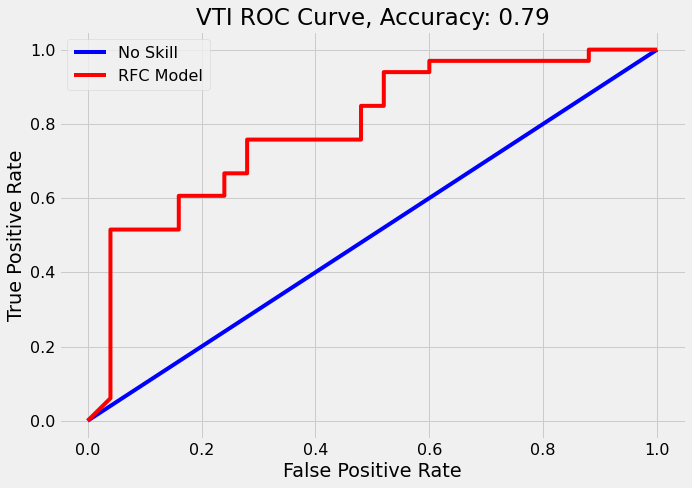

In [23]:
plt.rcParams['font.size'] = 16
base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
model_fpr, model_tpr, _ = roc_curve(y_test, y_probs)

plt.figure(figsize=(10,7))
plt.plot(base_fpr, base_tpr, 'b', label='No Skill')
plt.plot(model_fpr, model_tpr, 'r', label='RFC Model')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'{symbol} ROC Curve, Accuracy: {round(roc_value, 3)}');

### Measures of Performance: Confusion Matrix

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 230 out of 230 | elapsed:    0.0s finished


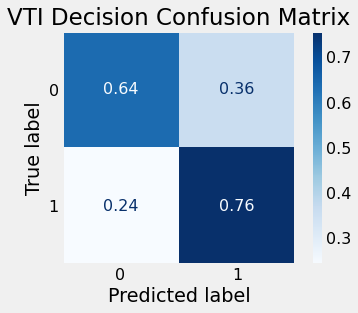

In [24]:
plt.rcParams['figure.figsize'] = (5, 4)
plt.rcParams['font.size'] = 16
disp = plot_confusion_matrix(rfc
                           , X_test
                           , y_test
                           , cmap=plt.cm.Blues
                           , normalize='true'
                     )
disp.ax_.grid(False)
disp.ax_.set_title(f'{symbol} Decision Confusion Matrix');

### Measures of Performance: Precision Recall Curve

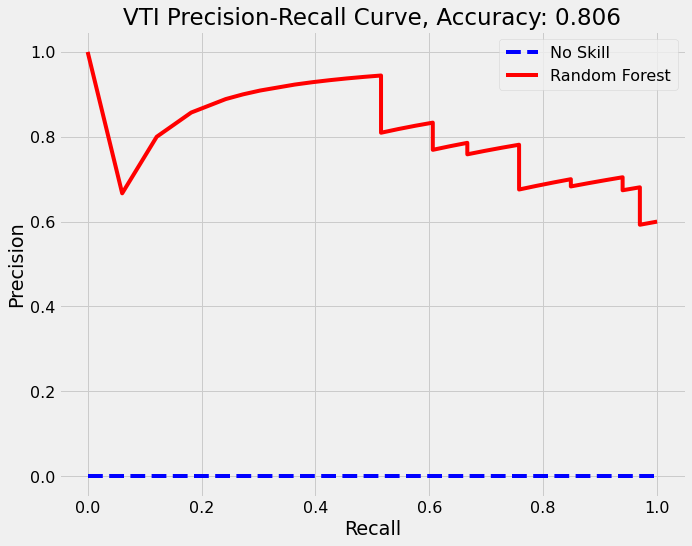

In [25]:
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (10,8)
rf_prec, rf_recall, _ = precision_recall_curve(y_test, y_probs)
plt.plot([0, 0], linestyle = '--', color = 'b', label='No Skill')
plt.plot(rf_recall, rf_prec, color='r', label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title(f'{symbol} Precision-Recall Curve, Accuracy: {round(auc(rf_recall, rf_prec), 3)}');

### Measure of Performance: Feature Importances

In [26]:
feature_df = pd.DataFrame({'feature': X_train.columns
                           , 'importances': rfc.feature_importances_
                          }).sort_values('importances', ascending=False)
feature_df

,feature,importances
2,Low,0.184044
4,Adj Close,0.175444
0,Open,0.174955
1,High,0.164130
5,Volume,0.152281
3,Close,0.149145


In [27]:
stock_df_bal.head()

,Open,High,Low,Close,Adj Close,Volume,decision
0,135.270004,135.650101,134.449997,135.130005,135.130005,2051901,0
1,158.600006,158.699997,158.440002,158.639999,158.639999,1015886,0
2,149.979996,150.309998,149.929993,149.949997,149.949997,864394,0
3,149.785004,149.960007,149.770004,149.839996,149.839996,299094,0
4,140.820000,141.250000,140.820000,140.830000,140.830000,0,0


### Make A Prediction

In [28]:
last = stock_df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].iloc[-1]
last

Open         153.048004
High         153.048004
Low          153.048004
Close        153.048004
Adj Close    153.048004
Volume         0.000000
Name: 2020-06-15 11:08:23-04:00, dtype: float64

In [29]:
if rfc.predict(np.array(last).reshape(1, -1))[0] == 1:
    print(f'Buy {symbol} on the {interval} interval.')
else:
    print(f'Sell or hold {symbol} on the {interval} interval.')

Buy VTI on the 60m interval.


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 230 out of 230 | elapsed:    0.0s finished
